<a href="https://colab.research.google.com/github/venelove/Pemprograman-Dasar/blob/main/Praktikum_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#A. Dataset 1: Data Kota dan jumlah Bandara

1. Persiapan Dataset


In [ ]:
#Persiapan Dataset
import pandas as pd

city_names = ['Jakarta', 'Bandung', 'Makassar', 'Surabaya', 'Medan', 'Yogyakarta', 'Malang']
population = [498044, 964254, 491918, 8398748, 653115, 883305, 744955]
num_airports = [2, 2, 8, 3, 1, 3, 2]

df = pd.DataFrame({
    'City Name': city_names,
    'Population': population,
    'Airports': num_airports,
})

df

,City Name,Population,Airports
0,Jakarta,498044,2
1,Bandung,964254,2
2,Makassar,491918,8
3,Surabaya,8398748,3
4,Medan,653115,1
5,Yogyakarta,883305,3
6,Malang,744955,2


**PRAKTIKUM 1 – Statistik Deskriptif (describe(), mean(), mode())**

In [ ]:
df.describe()

# Rata-rata populasi
rata_rata_populasi = df['Population'].mean()
print("Rata-rata populasi:", rata_rata_populasi)

# Modus jumlah bandara
modus_airports = df['Airports'].mode()
print("Modus Airports:", modus_airports)

#Hitung rata-rata populasi
rata_rata = df['Population'].mean()

#Hitung selisih absolut tiap kota dengan rata-rata
df['Selisih'] = abs(df['Population'] - rata_rata)

#Ambil kota dengan selisih paling kecil
kota_terdekat = df.loc[df['Selisih'].idxmin()]



Rata-rata populasi: 1804905.5714285714
Modus Airports: 0    2
Name: Airports, dtype: int64


TUGAS:

1.Kota mana yang populasinya mendekati rata-rata?

Kota yang populasinya mendekati rata-rata adalah kota yang memiliki nilai populasi paling dekat dengan nilai mean() kolom Population.

(BANDUNG)

2.Apa arti modus untuk kolom Airports?


Modus (mode) adalah nilai yang paling sering muncul dalam suatu data.
Jadi untuk kolom Airports, artinya adalah:
Jumlah bandara yang paling sering dimiliki oleh kota-kota dalam dataset.

(MAKASAR)


**PRAKTIKUM 2 – Visualisasi Distribusi (hist())**

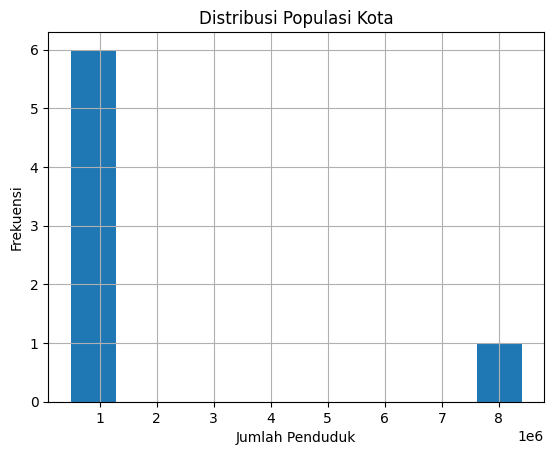

In [ ]:
import matplotlib.pyplot as plt

df['Population'].hist()
plt.title("Distribusi Populasi Kota")
plt.xlabel("Jumlah Penduduk")
plt.ylabel("Frekuensi")
plt.show()

TUGAS:

Tuliskan pengamatan dari histogram tersebut.


-Distribusi sangat tidak merata (tidak simetris).

Mayoritas kota memiliki jumlah penduduk di bawah 1 juta, terlihat dari batang pertama yang sangat tinggi (frekuensi sekitar 6 data).

-Terdapat outlier (nilai pencilan) pada populasi besar.
Dua kota memiliki penduduk sekitar 7–8 juta, terlihat sebagai dua batang yang berdiri jauh di sisi kanan histogram.
Ini menunjukkan adanya kota dengan populasi sangat besar dibanding kota lainnya.

-Histogram miring ke kanan (right-skewed).
Artinya sebagian besar kota berpenduduk rendah, tetapi ada sedikit kota berpenduduk sangat tinggi.

-Rentang data sangat lebar — dari sekitar ratusan ribu hingga jutaan penduduk.
Karena jarak antar data sangat besar, grafik tampak “kosong” di tengah, menunjukkan gap besar antara kota kecil dan kota besar.

-Konsentrasi data berada di rentang kecil.
Kota dengan populasi <1 juta mendominasi distribusi.

**PRAKTIKUM 3 – Korelasi & Kovarian (corr(), cov())**

In [11]:
# Korelasi
corr_matrix = df[['Population', 'Airports']].corr()
print("Korelasi:", corr_matrix)

# Kovarian
cov_matrix = df[['Population', 'Airports']].cov()
print("Kovarian:", cov_matrix)

Korelasi:             Population  Airports
Population    1.000000 -0.026109
Airports     -0.026109  1.000000
Kovarian:               Population       Airports
Population  8.486123e+12 -175648.833333
Airports   -1.756488e+05       5.333333


TUGAS:
* 1. Apakah korelasinya positif atau negatif? *Korelasinya adalah negatif, dengan nilai -0.026109. Ini menunjukkan hubungan yang sangat lemah, mendekati nol.*
* 2. Apakah kota dengan penduduk besar cenderung punya lebih banyak bandara? *Tidak*

**PRAKTIKUM 4 – Groupby (groupby(), mean(), agg())**

In [ ]:
# Menambah kolom kategori
df['Kategori_Bandara'] = df['Airports'].apply(lambda x: 'Banyak' if x >= 3 else 'Sedikit')
df

# Rata-rata populasi per kategori
group_mean = df.groupby('Kategori_Bandara')['Population'].mean()
print(group_mean)

# Agregasi lengkap
group_agg = df.groupby('Kategori_Bandara').agg({
    'Population': ['mean', 'max'],
    'Airports': ['mean', 'count']
})
group_agg

TUGAS:

1.Bandingkan populasi kota dengan kategori “Banyak” dan “Sedikit”.

-Kategori Banyak bandara (≥ 3 bandara):

Rata-rata populasi: 3.257.990 jiwa

Populasi maksimal: 8.398.748 jiwa

Jumlah kota: 3 kota

Rata-rata bandara: 4.66 bandara

-Kategori Sedikit bandara (< 3 bandara):

Rata-rata populasi: 715.902 jiwa

Populasi maksimal: 964.254 jiwa

Jumlah kota: 4 kota

Rata-rata bandara: 1.75 bandara

2.Apa kesimpulannya?

lebih tinggi dibandingkan dengan kota-kota yang memiliki “Sedikit” bandara. Ini menunjukkan adanya hubungan bahwa kota dengan populasi yang lebih besar cenderung memiliki jumlah bandara yang lebih banyak.

#
#B. Dataset 2: Body Measurement

**1. Persiapan Dataset**

In [ ]:
import pandas as pd

body_measurement_df = pd.DataFrame.from_records((
  (2, 83.82, 8.4),
  (4, 99.31, 16.97),
  (3, 96.52, 14.41),
  (6, 114.3, 20.14),
  (4, 101.6, 16.91),
  (2, 86.36, 12.64),
  (3, 92.71, 14.23),
  (2, 85.09, 11.11),
  (2, 85.85, 14.18),
  (5, 106.68, 20.01),
  (4, 99.06, 13.17),
  (5, 109.22, 15.36),
  (4, 100.84, 14.78),
  (6, 115.06, 20.06),
  (2, 84.07, 10.02),
  (7, 121.67, 28.4),
  (3, 94.49, 14.05),
  (6, 116.59, 17.55),
  (7, 121.92, 22.96),
), columns=("age", "height_cm", "weight_kg"))

body_measurement_df

**PRAKTIKUM 5 – Statistik Deskriptif**

In [ ]:
# Ringkasan statistik
body_measurement_df.describe()

# Rata-rata tinggi & berat
mean_height = body_measurement_df['height_cm'].mean()
mean_weight = body_measurement_df['weight_kg'].mean()
print("Rata-rata tinggi:", mean_height)
print("Rata-rata berat:", mean_weight)

# Modus umur
mode_age = body_measurement_df['age'].mode()
print("Modus umur:", mode_age)

TUGAS:

1Umur berapa yang paling sering muncul?

umur yang paling sering muncul adalah 2 tahun (nilai modus = 2).


2.Apakah berat badan rata-rata ringan/sedang/berat?

Lebih Kecil 12 kg → ringan (underweight)

12–16 kg → sedang / normal

Lbih Besar 16 kg → cenderung berat

Karena 16,07 kg berada tepat di batas atas normal, maka kategorinya adalah:

Berat badan rata-rata termasuk kategori sedang (normal) menuju berat.

**PRAKTIKUM 6 – Distribusi Tinggi & Berat**

In [ ]:
import matplotlib.pyplot as plt

# Tinggi
body_measurement_df['height_cm'].hist()
plt.title("Distribusi Tinggi Badan (cm)")
plt.show()

# Berat
body_measurement_df['weight_kg'].hist()
plt.title("Distribusi Berat Badan (kg)")
plt.show()

TUGAS:

Apakah tinggi & berat menyebar rata atau menumpuk?

1.Tinggi badan tidak menyebar rata, tetapi cenderung menumpuk pada dua kelompok tinggi tertentu.

2.Berat badan juga tidak menyebar rata. Data cenderung menumpuk di berat 10–15 kg, dengan sedikit nilai ekstrim di 20–28 kg.


**PRAKTIKUM 7 – Groupby Usi**a

In [ ]:
# Mean
group_mean_age = body_measurement_df.groupby("age").mean()
group_mean_age

# Agg lengkap
group_agg_age = body_measurement_df.groupby("age").agg({
    'height_cm': ['mean', 'min', 'max'],
    'weight_kg': ['mean', 'min', 'max']
})
group_agg_age

TUGAS:

1.Usia berapa rata-rata berat paling tinggi?

Rata-rata berat paling tinggi terjadi pada usia 7 tahun, yaitu ± 25.68 kg.

2.Apakah tinggi meningkat sesuai usia?

tinggi meningkat sesuai usia secara konsisten.


**PRAKTIKUM 8 – Korelasi & Kovarian**

In [ ]:
# Korelasi
corr_hw = body_measurement_df[['height_cm', 'weight_kg']].corr()
print(corr_hw)

# Kovarian
cov_hw = body_measurement_df[['height_cm', 'weight_kg']].cov()
print(cov_hw)

TUGAS:

1.Apakah korelasinya kuat/lemah?

-Korelasinya sangat kuat.
Artinya perubahan tinggi tubuh sangat berhubungan dengan perubahan berat badan.

2.Apakah hubungannya positif?

Nilai korelasi positif (0.888) → artinya:

-Ya, hubungan tinggi dan berat bersifat positif.
Semakin tinggi seseorang, cenderung semakin berat badannya.
